<a href="https://colab.research.google.com/github/keerthi2625/AIML/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns

In [4]:
df = pd.read_csv('/content/breast_cancer_survival (1).csv')
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


prepare the dictionary format to access the data using its keys.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [6]:
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

Describe the DataFrame's numerical features

In [7]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900



Check for missing values

In [8]:
print(df.isnull().sum())

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64



Identify the target class and handle missing values

In [9]:
df['Patient_Status'] = df['Patient_Status'].fillna(df['Patient_Status'].mode()[0])
target_class = df['Patient_Status']


Exploratory data analysis using seaborn

Pairplot to visualize relationships between features

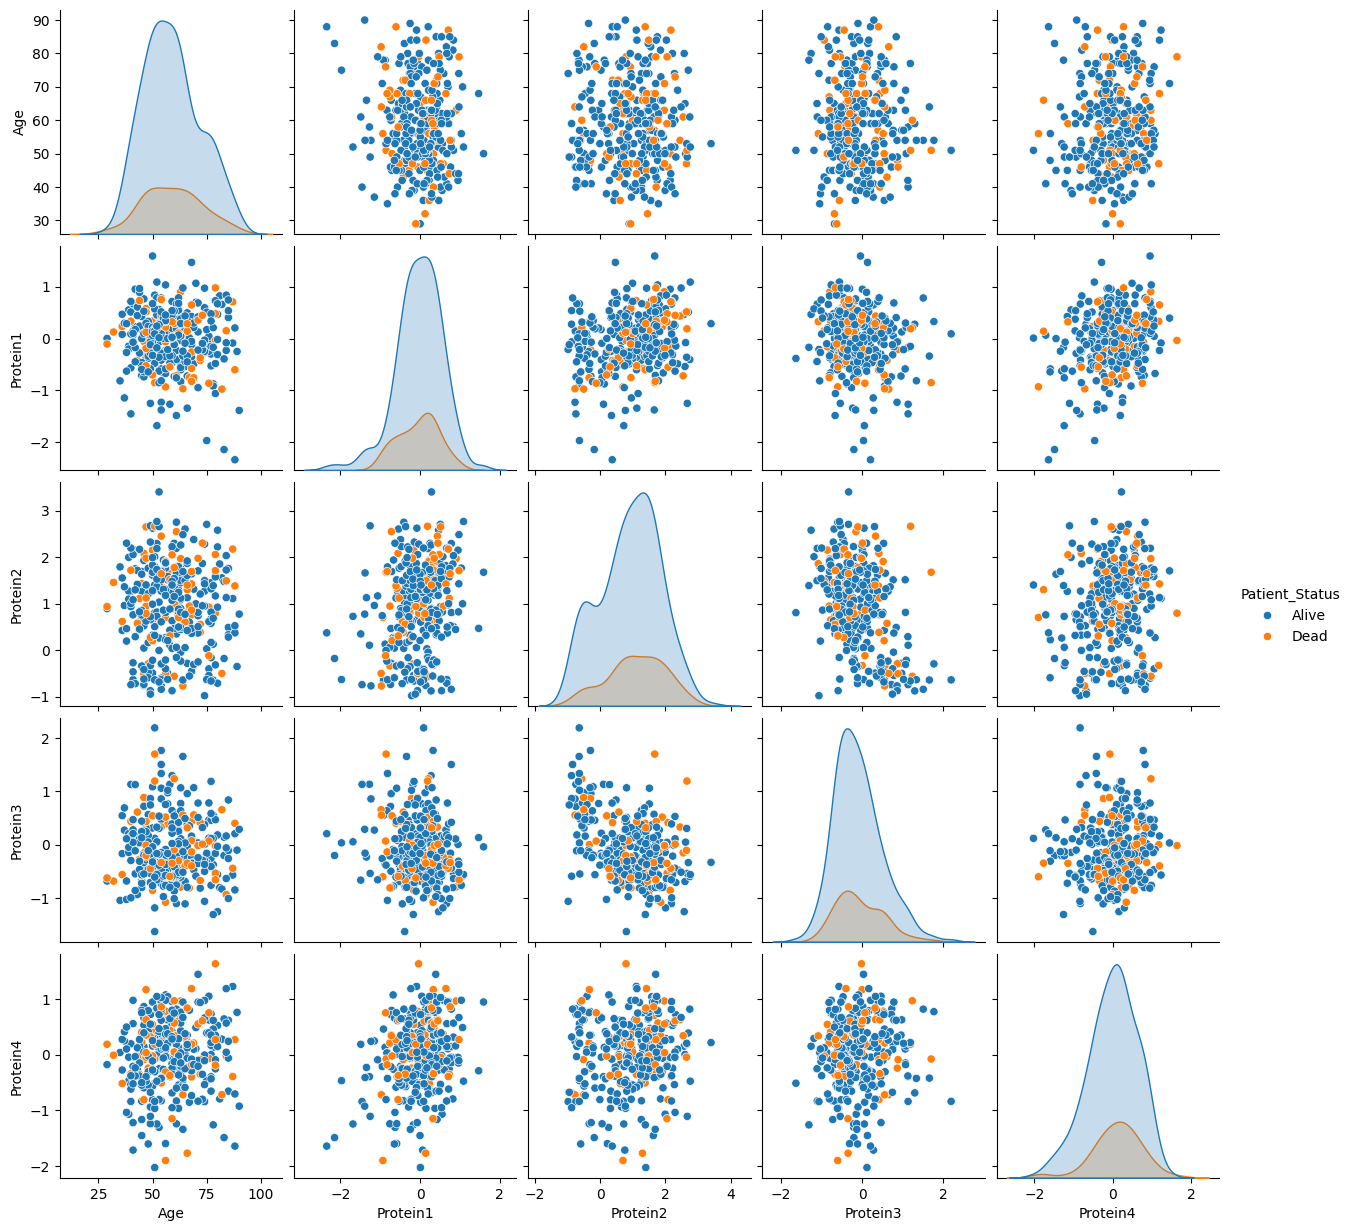

In [10]:
features = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
            'Tumour_Stage', 'Patient_Status']  # Filtered for numerical columns
# Create pair plot
sns.pairplot(df[features], hue='Patient_Status')
plt.show()

Correlation matrix heatmap

Text(0.5, 1.0, 'Correlation Heatmap of Selected Features')

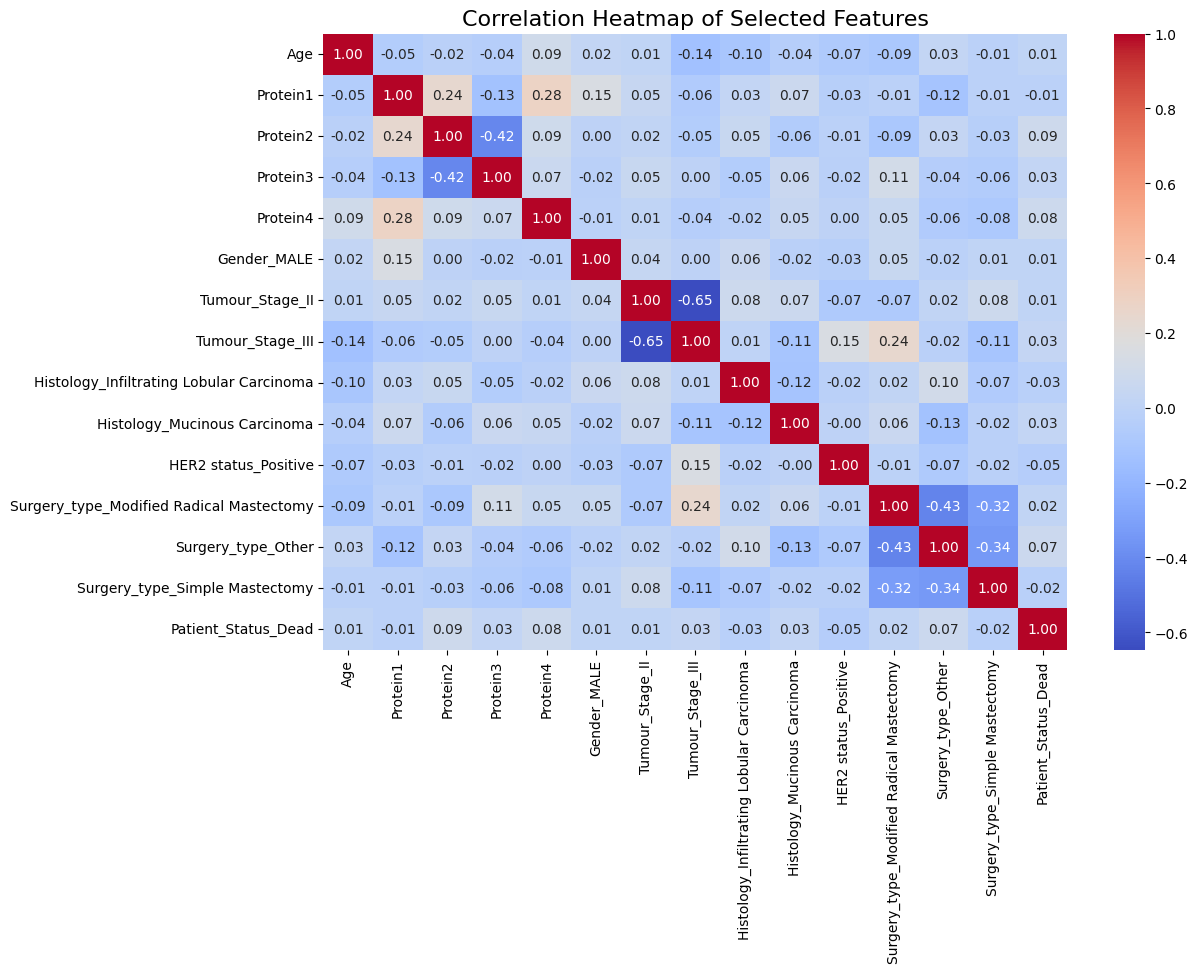

In [11]:
df_encoded = pd.get_dummies(df[['Gender', 'Tumour_Stage', 'Histology', 'ER status',
                                'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status']],
                            drop_first=True)
df_numeric = pd.concat([df[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']], df_encoded], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')


plt.title('Correlation Heatmap of Selected Features', fontsize=16)

Boxplot of first 10 columns to check their role in cancer

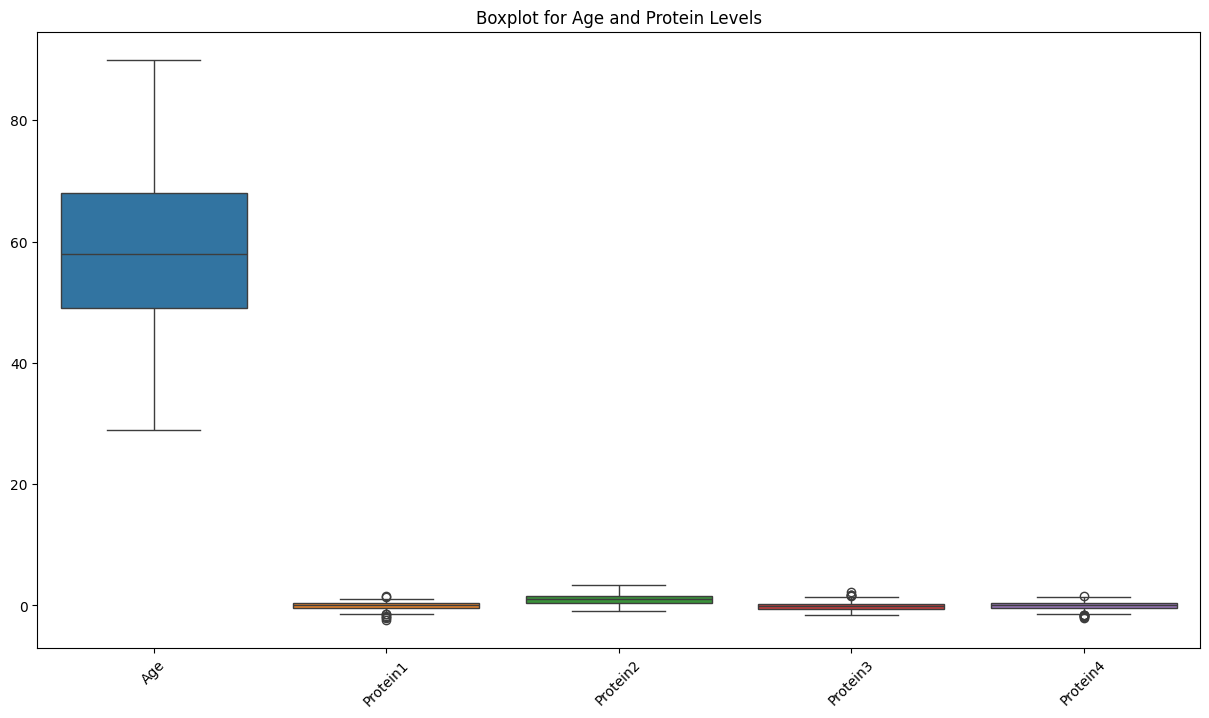

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']])
plt.title('Boxplot for Age and Protein Levels')
plt.xticks(rotation=45)
plt.show()

Train and Test Data
• Prepare the Train and Test data from the dataframe.

• Drop the cancer columns and define the dataframe with only target results

• Split the data into train, test using train test split

In [13]:
X = df.drop('Patient_Status', axis=1)
y = df['Patient_Status']
X = pd.get_dummies(X, columns=['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type'], drop_first=True)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X.fillna(X.mean(), inplace=True)


Split the data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed


Train the SVC using the Train Dataset.

• import sklearn.svm import SVC

• Apply the model.fit to dataset

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Before scaling, impute NaN values in X_train and X_test
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train_imputed = imputer.fit_transform(X_train) # Fit and transform on training data
X_test_imputed = imputer.transform(X_test) # Transform test data


# Standardize the features (scaling is important for SVM performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed) # Use imputed data for scaling
X_test_scaled = scaler.transform(X_test_imputed) # Use imputed data for scaling

# Step 1: Import SVC from sklearn.svm
# Initialize the SVM model with a linear kernel (you can change it to 'rbf' or 'poly')
model = SVC(kernel='linear')

# Step 2: Apply the model.fit to the training dataset
# Train the model using the training data
model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model's performance (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.09%


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Date_of_Surgery' 'Date_of_Last_Visit']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Date_of_Surgery' 'Date_of_Last_Visit']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Predict and Analysis the Performance of the SVC Model

• Apply model.predict(X test)

• Generate the classification report, confusion matrix using sklearn.metrics

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)


Confusion Matrix:
[[55  0]
 [12  0]]
Classification Report:
              precision    recall  f1-score   support

       Alive       0.82      1.00      0.90        55
        Dead       0.00      0.00      0.00        12

    accuracy                           0.82        67
   macro avg       0.41      0.50      0.45        67
weighted avg       0.67      0.82      0.74        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


.Improve the Accuracy of Model using GridSearchCV Model.

• Given the following parameters validate the GridSearchCV Model:

param grid = ’C’: [0.1,1, 10, 100, 1000], ’gamma’: [1,0.1,0.01,0.001,0.0001], ’kernel’: [’rbf’]

• Implement the model.predict

• Generate the classification report, confusion matrix using sklearn.metrics

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Step 8: Initialize the SVM model
model = SVC()
# Step 9: Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Step 10: Fit the GridSearchCV model to the training data
grid_search.fit(X_train_scaled, y_train)

# Step 11: Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Step 12: Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_ * 100:.2f}%")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 79.78%
